In [79]:
import pandas as pd

yield_rates1 = pd.read_csv('data/bond-yield/yield-curve-rates-1990-2021.csv')
yield_rates2 = pd.read_csv('data/bond-yield/yield-curve-rates-2022.csv')
yield_rates3 = pd.read_csv('data/bond-yield/yield-curve-rates-2023.csv')

frames = [yield_rates3, yield_rates2, yield_rates1]
yield_rates = pd.concat(frames, ignore_index=True)
yield_rates

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,10/26/2023,5.57,5.57,5.59,5.60,5.55,5.39,5.02,4.89,4.79,4.86,4.86,5.19,5.01
1,10/25/2023,5.56,5.57,5.59,5.61,5.57,5.43,5.08,4.98,4.89,4.98,4.95,5.27,5.09
2,10/24/2023,5.57,5.57,5.58,5.60,5.57,5.41,5.02,4.91,4.82,4.86,4.83,5.15,4.96
3,10/23/2023,5.57,5.57,5.58,5.59,5.56,5.42,5.05,4.89,4.81,4.87,4.86,5.19,5.01
4,10/20/2023,5.56,5.56,5.58,5.61,5.54,5.41,5.07,4.93,4.86,4.93,4.93,5.27,5.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8458,1/8/90,NaN,NaN,7.79,NaN,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
8459,1/5/90,NaN,NaN,7.79,NaN,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
8460,1/4/90,NaN,NaN,7.84,NaN,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
8461,1/3/90,NaN,NaN,7.89,NaN,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04


In [80]:
stock_symbol = 'RY.TO'
bank_data = pd.read_csv('data/banks/{}_delta_extremes.csv'.format(stock_symbol), index_col=0)
bank_data.head()

,Date,Adj Close,Delta,Extremes
0,1995-01-12,2.391347,NaN,NaN
1,1995-01-13,2.414120,0.952308,Non-Extreme
2,1995-01-16,2.459670,1.886816,Non-Extreme
3,1995-01-17,2.425963,-1.370387,Non-Extreme
4,1995-01-18,2.448739,0.938844,Non-Extreme


In [81]:
# print(yield_rates.loc[0]['10 Yr'])
# print(yield_rates.loc[0]['2 Yr'])
# print(yield_rates.loc[0]['3 Mo'])

spread_10_2 = []
spread_10_3 = []

for i in range(len(yield_rates)):
    spread_10_2.append(yield_rates.loc[i]['10 Yr'] - yield_rates.loc[i]['2 Yr'])
    spread_10_3.append(yield_rates.loc[i]['10 Yr'] - yield_rates.loc[i]['3 Mo'])

yield_spread = yield_rates.copy()
yield_spread['spread_10_2'] = spread_10_2
yield_spread['spread_10_3'] = spread_10_3
yield_spread.head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,spread_10_2,spread_10_3
0,10/26/2023,5.57,5.57,5.59,5.60,5.55,5.39,5.02,4.89,4.79,4.86,4.86,5.19,5.01,-0.16,-0.73
1,10/25/2023,5.56,5.57,5.59,5.61,5.57,5.43,5.08,4.98,4.89,4.98,4.95,5.27,5.09,-0.13,-0.64
2,10/24/2023,5.57,5.57,5.58,5.60,5.57,5.41,5.02,4.91,4.82,4.86,4.83,5.15,4.96,-0.19,-0.75
3,10/23/2023,5.57,5.57,5.58,5.59,5.56,5.42,5.05,4.89,4.81,4.87,4.86,5.19,5.01,-0.19,-0.72
4,10/20/2023,5.56,5.56,5.58,5.61,5.54,5.41,5.07,4.93,4.86,4.93,4.93,5.27,5.09,-0.14,-0.65


In [82]:
yield_dates = pd.to_datetime(yield_spread['Date'])

new_yield = pd.DataFrame({
    'Date' : yield_dates, 
    'spread_10_2': yield_spread['spread_10_2'], 
    'spread_10_3': yield_spread['spread_10_3']
    })
# new_yield.head()

bank_dates = pd.to_datetime(bank_data['Date'])

new_bank = pd.DataFrame({
    'Date': bank_dates,
    'Adj Close': bank_data['Adj Close'],
    'Delta': bank_data['Delta'],
    'Extremes' : bank_data['Extremes']
})
# new_bank.head()

bank_yield = pd.merge(new_yield, new_bank, how='inner')
# bank_yield.head()

bank_yield_copy = bank_yield.copy()
# print(len(bank_yield))
bank_yield_final = bank_yield_copy.dropna().iloc[::-1]
# print(len(bank_yield_final))
bank_yield_final.head()

,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes
7070,1995-01-13,0.30,1.97,2.414120,0.952308,Non-Extreme
7069,1995-01-17,0.26,1.81,2.425963,-1.370387,Non-Extreme
7068,1995-01-18,0.23,1.84,2.448739,0.938844,Non-Extreme
7067,1995-01-19,0.25,1.87,2.463472,0.601657,Non-Extreme
7066,1995-01-20,0.32,1.91,2.440450,-0.934535,Non-Extreme


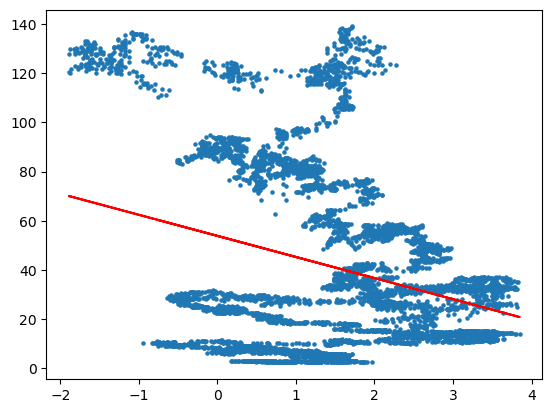

price = 53.88839123614357 + (-8.578156263537458) * spread
Correlation: -0.2793848064145769
R-Squared: 0.07805587005531062


In [83]:
from scipy import stats
import matplotlib.pyplot as plt

def plot_line(x, y):

    slope, intercept, r, p, std_err = stats.linregress(x, y)

    def slr(x): 
        return slope * x + intercept

    my_model = list(map(slr, x))

    plt.scatter(x,y, s=5)
    plt.plot(x, my_model, color = 'red')
    plt.show()

    print('price = {b0} + ({b1}) * spread'.format(b0 = intercept, b1 = slope))
    print('Correlation: {}'.format(x.corr(y)))
    print('R-Squared: {}'.format((x.corr(y))**2))


plot_line(bank_yield_final['spread_10_3'], bank_yield_final['Adj Close'])

In [84]:
df = bank_yield_final.set_index(bank_yield_final['Date'])
df

,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes
Date,,,,,,
1995-01-13,1995-01-13,0.30,1.97,2.414120,0.952308,Non-Extreme
1995-01-17,1995-01-17,0.26,1.81,2.425963,-1.370387,Non-Extreme
1995-01-18,1995-01-18,0.23,1.84,2.448739,0.938844,Non-Extreme
1995-01-19,1995-01-19,0.25,1.87,2.463472,0.601657,Non-Extreme
1995-01-20,1995-01-20,0.32,1.91,2.440450,-0.934535,Non-Extreme
...,...,...,...,...,...,...
2023-10-18,2023-10-18,-0.28,-0.70,113.650002,-1.627280,Non-Extreme
2023-10-19,2023-10-19,-0.16,-0.62,113.029999,-0.545537,Non-Extreme
2023-10-20,2023-10-20,-0.14,-0.65,111.010002,-1.787134,Non-Extreme


In [85]:
dividend_frame = pd.read_csv('data/banks/RY.TO_dividend_extremes.csv', index_col=0)
dividend_frame

,Date,Dividends,Adj Close,Total Return Delta,Extremes
0,1995-01-19,0.0725,2.463472,NaN,NaN
1,1995-04-18,0.0725,2.766377,15.238858,Non-Extreme
2,1995-07-21,0.0725,2.770013,2.752192,Non-Extreme
3,1995-10-23,0.0775,2.727312,1.256276,Non-Extreme
4,1996-01-22,0.0775,3.077075,15.666084,Non-Extreme
...,...,...,...,...,...
110,2022-07-25,1.2800,118.246300,-5.291930,Non-Extreme
111,2022-10-25,1.2800,120.231247,2.761141,Non-Extreme
112,2023-01-25,1.3200,130.836365,9.918485,Non-Extreme
113,2023-04-24,1.3200,132.105591,1.978980,Non-Extreme


In [117]:
dividend_yields = []

for i in range(0, len(dividend_frame)):
    div_yield = 400 * (dividend_frame.loc[i]['Dividends'] / dividend_frame.loc[i]['Adj Close'])
    dividend_yields.append(div_yield)

dividend_frame['Dividend Yield'] = dividend_yields
dividend_frame['Month'] = pd.DatetimeIndex(dividend_frame['Date']).month
dividend_frame


,Date,Dividends,Adj Close,Total Return Delta,Extremes,Dividend Yield,Month
0,1995-01-19,0.0725,2.463472,NaN,NaN,11.772003,1
1,1995-04-18,0.0725,2.766377,15.238858,Non-Extreme,10.483025,4
2,1995-07-21,0.0725,2.770013,2.752192,Non-Extreme,10.469265,7
3,1995-10-23,0.0775,2.727312,1.256276,Non-Extreme,11.366503,10
4,1996-01-22,0.0775,3.077075,15.666084,Non-Extreme,10.074503,1
...,...,...,...,...,...,...,...
110,2022-07-25,1.2800,118.246300,-5.291930,Non-Extreme,4.329945,7
111,2022-10-25,1.2800,120.231247,2.761141,Non-Extreme,4.258460,10
112,2023-01-25,1.3200,130.836365,9.918485,Non-Extreme,4.035575,1
113,2023-04-24,1.3200,132.105591,1.978980,Non-Extreme,3.996803,4


In [124]:
yearly_yield = dividend_frame.loc[dividend_frame['Month'] == 10].reset_index(drop=True)
yearly_yield


,Date,Dividends,Adj Close,Total Return Delta,Extremes,Dividend Yield,Month
0,1995-10-23,0.0775,2.727312,1.256276,Non-Extreme,11.366503,10
1,1996-10-22,0.0850,4.212581,29.397038,Positive Extreme,8.071061,10
2,1997-10-23,0.0975,7.459699,11.431408,Non-Extreme,5.228093,10
3,1998-10-22,0.1150,6.784472,-20.858365,Negative Extreme,6.780189,10
4,1999-10-21,0.1200,6.508899,-7.542210,Non-Extreme,7.374519,10
5,2000-10-23,0.1500,8.937460,8.629896,Non-Extreme,6.713317,10
6,2001-10-22,0.1800,10.160170,-8.151647,Non-Extreme,7.086496,10
7,2002-10-21,0.2000,13.006036,18.465752,Non-Extreme,6.150990,10
8,2003-10-23,0.2300,15.121565,11.622864,Non-Extreme,6.084026,10
9,2004-10-22,0.2600,14.950567,3.429629,Non-Extreme,6.956258,10


In [126]:
dividend_range = df['1995-01-19':'2023-7-24']
dividend_range

,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes
Date,,,,,,
1995-01-19,1995-01-19,0.25,1.87,2.463472,0.601657,Non-Extreme
1995-01-20,1995-01-20,0.32,1.91,2.440450,-0.934535,Non-Extreme
1995-01-23,1995-01-23,0.33,1.86,2.417428,-0.943351,Non-Extreme
1995-01-24,1995-01-24,0.29,1.88,2.463472,1.904669,Non-Extreme
1995-01-25,1995-01-25,0.30,1.86,2.532542,2.803766,Positive Extreme
...,...,...,...,...,...,...
2023-07-18,2023-07-18,-0.94,-1.69,128.334534,0.457111,Non-Extreme
2023-07-19,2023-07-19,-0.99,-1.74,128.839325,0.393340,Non-Extreme
2023-07-20,2023-07-20,-0.95,-1.64,129.096664,0.199736,Non-Extreme


In [133]:
from datetime import datetime

yield_list = []

for i in range(len(yearly_yield) - 1):

    div_yield = yearly_yield.loc[i]['Dividend Yield']

    start_point = yearly_yield.loc[i]['Date']
    end_point = yearly_yield.loc[i+1]['Date']
    date_obj = datetime.strptime(end_point, '%Y-%m-%d').date()
    date_str = '{y}-{m}-{d}'.format(y=date_obj.year, m=date_obj.month, d=date_obj.day - 1)
    quarter_len = len(dividend_range[start_point: date_str])

    for j in range(quarter_len):
        yield_list.append(div_yield)

# print(len(yield_list))
spread_yield_3 = df['1995-10-23':'2022-10-24'].copy()
spread_yield_3['Dividend Yield'] = yield_list
spread_yield_3

,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes,Dividend Yield
Date,,,,,,,
1995-10-23,1995-10-23,0.31,0.69,2.727312,-4.769766,Negative Extreme,11.366503
1995-10-24,1995-10-24,0.34,0.64,2.751025,0.869464,Non-Extreme,11.366503
1995-10-25,1995-10-25,0.36,0.61,2.703596,-1.724048,Non-Extreme,11.366503
1995-10-26,1995-10-26,0.45,0.68,2.739644,1.333335,Non-Extreme,11.366503
1995-10-27,1995-10-27,0.41,0.64,2.787073,1.731210,Non-Extreme,11.366503
...,...,...,...,...,...,...,...
2022-10-18,2022-10-18,-0.42,-0.03,119.302925,0.501696,Non-Extreme,3.490205
2022-10-19,2022-10-19,-0.41,0.07,118.419205,-0.740736,Non-Extreme,3.490205
2022-10-20,2022-10-20,-0.38,0.15,116.930313,-1.257306,Non-Extreme,3.490205


In [89]:
yield_list = []

for i in range(len(dividend_frame)-1):

    start_point = dividend_frame.loc[i]['Date']
    div_yield = dividend_frame.loc[i]['Dividend Yield']
    # print(div_yield)
    end_point = dividend_frame.loc[i+1]['Date']
    
    date_obj = datetime.strptime(end_point, '%Y-%m-%d').date()
    date_str = '{y}-{m}-{d}'.format(y=date_obj.year, m=date_obj.month, d=date_obj.day - 1)
    
    quarter_len = len(dividend_range[start_point: date_str])
    
    for j in range(quarter_len):
        yield_list.append(div_yield)

spread_yield = dividend_range.copy()
spread_yield['Dividend Yield'] = yield_list
spread_yield

,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes,Dividend Yield
Date,,,,,,,
1995-01-19,1995-01-19,0.25,1.87,2.463472,0.601657,Non-Extreme,11.772003
1995-01-20,1995-01-20,0.32,1.91,2.440450,-0.934535,Non-Extreme,11.772003
1995-01-23,1995-01-23,0.33,1.86,2.417428,-0.943351,Non-Extreme,11.772003
1995-01-24,1995-01-24,0.29,1.88,2.463472,1.904669,Non-Extreme,11.772003
1995-01-25,1995-01-25,0.30,1.86,2.532542,2.803766,Positive Extreme,11.772003
...,...,...,...,...,...,...,...
2023-07-18,2023-07-18,-0.94,-1.69,128.334534,0.457111,Non-Extreme,3.996803
2023-07-19,2023-07-19,-0.99,-1.74,128.839325,0.393340,Non-Extreme,3.996803
2023-07-20,2023-07-20,-0.95,-1.64,129.096664,0.199736,Non-Extreme,3.996803


In [90]:
yield_list = []

for i in range(len(dividend_frame)-1):

    start_point = dividend_frame.loc[i]['Date']
    div_yield = dividend_frame.loc[i]['Dividends']
    # print(div_yield)
    end_point = dividend_frame.loc[i+1]['Date']
    
    date_obj = datetime.strptime(end_point, '%Y-%m-%d').date()
    date_str = '{y}-{m}-{d}'.format(y=date_obj.year, m=date_obj.month, d=date_obj.day - 1)
    
    quarter_len = len(dividend_range[start_point: date_str])
    
    for j in range(quarter_len):
        yield_list.append(div_yield*4)

spread_yield_2 = dividend_range.copy()
spread_yield_2['Dividends*4'] = yield_list
spread_yield_2

,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes,Dividends*4
Date,,,,,,,
1995-01-19,1995-01-19,0.25,1.87,2.463472,0.601657,Non-Extreme,0.29
1995-01-20,1995-01-20,0.32,1.91,2.440450,-0.934535,Non-Extreme,0.29
1995-01-23,1995-01-23,0.33,1.86,2.417428,-0.943351,Non-Extreme,0.29
1995-01-24,1995-01-24,0.29,1.88,2.463472,1.904669,Non-Extreme,0.29
1995-01-25,1995-01-25,0.30,1.86,2.532542,2.803766,Positive Extreme,0.29
...,...,...,...,...,...,...,...
2023-07-18,2023-07-18,-0.94,-1.69,128.334534,0.457111,Non-Extreme,5.28
2023-07-19,2023-07-19,-0.99,-1.74,128.839325,0.393340,Non-Extreme,5.28
2023-07-20,2023-07-20,-0.95,-1.64,129.096664,0.199736,Non-Extreme,5.28


In [91]:
daily_dividend = spread_yield_2.copy().reset_index(drop=True)
price_array = daily_dividend['Adj Close']
dividend_array = daily_dividend['Dividends*4']

daily_div_yield = []

for i in range(len(price_array)):
    daily_div_yield.append(
        100*(dividend_array[i] / price_array[i])
    )

daily_dividend['Dividend Yield'] = daily_div_yield
daily_dividend

,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes,Dividends*4,Dividend Yield
0,1995-01-19,0.25,1.87,2.463472,0.601657,Non-Extreme,0.29,11.772003
1,1995-01-20,0.32,1.91,2.440450,-0.934535,Non-Extreme,0.29,11.883054
2,1995-01-23,0.33,1.86,2.417428,-0.943351,Non-Extreme,0.29,11.996221
3,1995-01-24,0.29,1.88,2.463472,1.904669,Non-Extreme,0.29,11.772003
4,1995-01-25,0.30,1.86,2.532542,2.803766,Positive Extreme,0.29,11.450945
...,...,...,...,...,...,...,...,...
6997,2023-07-18,-0.94,-1.69,128.334534,0.457111,Non-Extreme,5.28,4.114247
6998,2023-07-19,-0.99,-1.74,128.839325,0.393340,Non-Extreme,5.28,4.098128
6999,2023-07-20,-0.95,-1.64,129.096664,0.199736,Non-Extreme,5.28,4.089959
7000,2023-07-21,-0.98,-1.66,129.690536,0.460021,Non-Extreme,5.28,4.071230


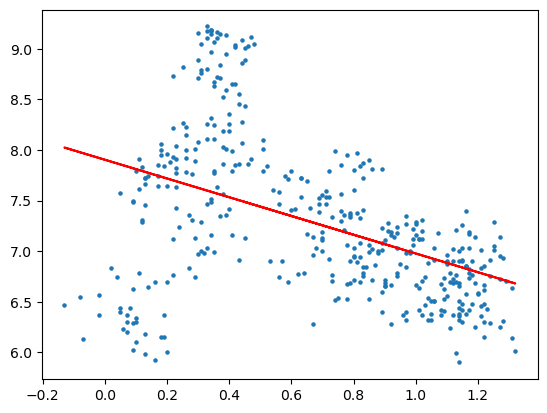

price = 7.903095596531039 + (-0.9263312503846807) * spread
Correlation: -0.45008267924947815
R-Squared: 0.20257441816038863


In [160]:
tech_bubble = df['1998-06-01':'2000-01-31']
# tech_bubble
plot_line(tech_bubble['spread_10_3'], tech_bubble['Adj Close'])

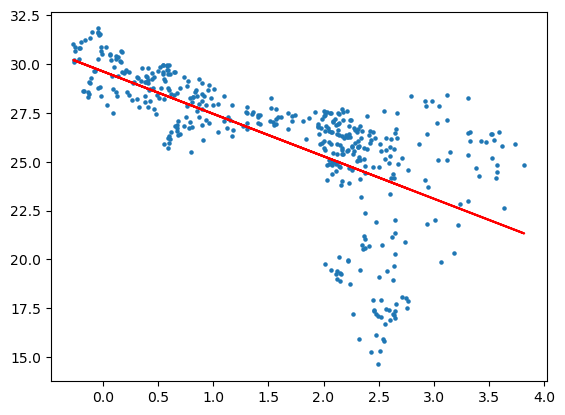

price = 29.62115389695254 + (-2.1698509324859123) * spread
Correlation: -0.6510130629257979
R-Squared: 0.42381800810002884


In [161]:
gfc = df['2007-05-01':'2009-02-27']
# gfc
plot_line(gfc['spread_10_3'],gfc['Adj Close'])
# gfc.to_csv('{}_gfc.csv'.format(stock_symbol))

In [99]:
covid_19 = df['2020-01-01':'2020-05-31']
# covid_19
plot_line(covid_19['spread_10_2'], covid_19['Adj Close'])

,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes
Date,,,,,,
2020-01-02,2020-01-02,0.30,0.34,89.188240,0.778602,Non-Extreme
2020-01-03,2020-01-03,0.27,0.28,88.860962,-0.366952,Non-Extreme
2020-01-06,2020-01-06,0.27,0.25,88.878174,0.019370,Non-Extreme
2020-01-07,2020-01-07,0.29,0.29,88.912628,0.038765,Non-Extreme
2020-01-08,2020-01-08,0.29,0.33,89.618912,0.794357,Non-Extreme
...,...,...,...,...,...,...
2020-05-22,2020-05-22,0.49,0.54,72.494934,-1.684973,Non-Extreme
2020-05-26,2020-05-26,0.51,0.55,77.570549,6.188201,Positive Extreme
2020-05-27,2020-05-27,0.49,0.53,81.289131,4.793806,Positive Extreme


In [102]:
bull_market_09_20 = df['2009-02-23':'2020-02-21']
bull_market_09_20
# bull_market_09_20.to_csv('{}_bull_market_09_20.csv'.format(stock_symbol))
plot_line(bull_market_09_20['spread_10_3'], bull_market_09_20['Adj Close'])

,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes
Date,,,,,,
2009-02-23,2009-02-23,1.82,2.49,14.628556,-4.617690,Negative Extreme
2009-02-24,2009-02-24,1.77,2.48,16.135603,10.302090,Positive Extreme
2009-02-25,2009-02-25,1.86,2.65,16.991108,5.301971,Positive Extreme
2009-02-26,2009-02-26,1.90,2.71,18.073244,6.368837,Positive Extreme
2009-02-27,2009-02-27,2.02,2.76,17.518003,-3.072171,Negative Extreme
...,...,...,...,...,...,...
2020-02-14,2020-02-14,0.17,0.01,94.201195,-0.009216,Non-Extreme
2020-02-18,2020-02-18,0.14,-0.03,93.809769,-0.415521,Non-Extreme
2020-02-19,2020-02-19,0.14,-0.02,93.731491,-0.083443,Non-Extreme


In [105]:
bull_market_00_07 = df['2000-01-01':'2007-05-31']
# bull_market_00_07
plot_line(bull_market_00_07['spread_10_2'], bull_market_00_07['Adj Close'])

,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes
Date,,,,,,
2000-01-04,2000-01-04,0.19,1.06,6.503633,-2.755971,Negative Extreme
2000-01-05,2000-01-05,0.24,1.18,6.477303,-0.404851,Non-Extreme
2000-01-06,2000-01-06,0.22,1.16,6.572095,1.463449,Non-Extreme
2000-01-07,2000-01-07,0.21,1.14,6.508899,-0.961581,Non-Extreme
2000-01-10,2000-01-10,0.19,1.15,6.414113,-1.456252,Non-Extreme
...,...,...,...,...,...,...
2007-05-24,2007-05-24,0.01,-0.05,31.820581,0.530648,Non-Extreme
2007-05-25,2007-05-25,0.01,-0.02,30.880966,-2.952853,Negative Extreme
2007-05-29,2007-05-29,0.00,-0.02,30.676250,-1.033028,Non-Extreme


In [107]:
bull_market_20_22 = df['2020-05-01':'2022-01-31']
# bull_market_20_22
plot_line(bull_market_20_22['spread_10_3'], bull_market_20_22['Adj Close'])

,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes
Date,,,,,,
2020-05-01,2020-05-01,0.44,0.52,74.442352,-1.342976,Non-Extreme
2020-05-04,2020-05-04,0.45,0.51,75.023903,0.781210,Non-Extreme
2020-05-05,2020-05-05,0.47,0.53,74.794807,-0.305364,Non-Extreme
2020-05-06,2020-05-06,0.55,0.60,74.565720,-0.306287,Non-Extreme
2020-05-07,2020-05-07,0.50,0.52,74.177994,-0.519979,Non-Extreme
...,...,...,...,...,...,...
2022-01-25,2022-01-25,0.76,1.59,133.084702,-0.647240,Non-Extreme
2022-01-26,2022-01-26,0.72,1.66,133.310883,0.169953,Non-Extreme
2022-01-27,2022-01-27,0.63,1.61,133.942276,0.473624,Non-Extreme


In [109]:
yield_spread.to_csv('yield_spread.csv')

In [110]:
# the price/book of ry from 2013-2023
ry_pb_13_23 = {
    '2013':2.34, '2014':2.38, '2015':1.88, '2016':2.1, '2017':2.21, '2018':1.83,
    '2019':1.89, '2020':1.84, '2021':2.08, '2022':1.75, '2023':1.46
    }
print(ry_pb_13_23['2013'])

ry_13_23 = df['2013-01-01': '2023-12-31']
ry_13_23.head()

2.34


,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes
Date,,,,,,
2013-01-02,2013-01-02,1.59,1.78,39.717976,1.035399,Non-Extreme
2013-01-03,2013-01-03,1.65,1.84,39.849274,0.330576,Non-Extreme
2013-01-04,2013-01-04,1.66,1.86,40.092178,0.609557,Non-Extreme
2013-01-07,2013-01-07,1.65,1.85,39.921497,-0.425721,Non-Extreme
2013-01-08,2013-01-08,1.64,1.82,39.777050,-0.361828,Non-Extreme


In [156]:
price_book = []
for i in range(2013, 2024):
    year = str(i)
    year_len = len(ry_13_23.loc[year])
    for j in range(0, year_len):
        price_book.append(ry_pb_13_23[year])

ry_copy = ry_13_23.copy()
ry_copy['Price/Book'] = price_book
ry_13_20 = ry_copy['2013':'2020'].copy()
ry_13_20

,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes,Price/Book
Date,,,,,,,
2013-01-02,2013-01-02,1.59,1.78,39.717976,1.035399,Non-Extreme,2.34
2013-01-03,2013-01-03,1.65,1.84,39.849274,0.330576,Non-Extreme,2.34
2013-01-04,2013-01-04,1.66,1.86,40.092178,0.609557,Non-Extreme,2.34
2013-01-07,2013-01-07,1.65,1.85,39.921497,-0.425721,Non-Extreme,2.34
2013-01-08,2013-01-08,1.64,1.82,39.777050,-0.361828,Non-Extreme,2.34
...,...,...,...,...,...,...,...
2020-12-23,2020-12-23,0.83,0.87,94.510651,1.333598,Non-Extreme,1.84
2020-12-24,2020-12-24,0.81,0.85,94.555710,0.047676,Non-Extreme,1.84
2020-12-29,2020-12-29,0.82,0.84,94.817085,0.276424,Non-Extreme,1.84


In [112]:
#multiple linear regression model

from sklearn import linear_model

# df = ry_copy.copy()

# column_2 = 'Dividend Yield' , 'Price/Book'

def MLR(df, column_2):
    X = df[['spread_10_3', '{}'.format(column_2)]]
    y = df['Adj Close']

    regr = linear_model.LinearRegression()
    regr.fit(X,y)
    fitted_values = regr.predict(df[['spread_10_3', '{}'.format(column_2)]])
    df['Fitted Values'] =  fitted_values

    plt.scatter(df['spread_10_3'], df['Adj Close'], s=5)
    plt.plot(df['spread_10_3'], df['Fitted Values'], color='red')
    plt.show()

    print('R-Squared: {}'.format(regr.score(X,y)))

    print(regr.coef_)
    print(regr.feature_names_in_)
    print(regr.intercept_)

# MLR(df['2013':'2019'])
# MLR(df)
# plot_line(df['2013':'2019']['spread_10_3'], df['2013':'2019']['Adj Close'])

# MLR(daily_dividend, 'Dividend Yield')
# plot_line(daily_dividend['spread_10_3'], daily_dividend['Adj Close'])

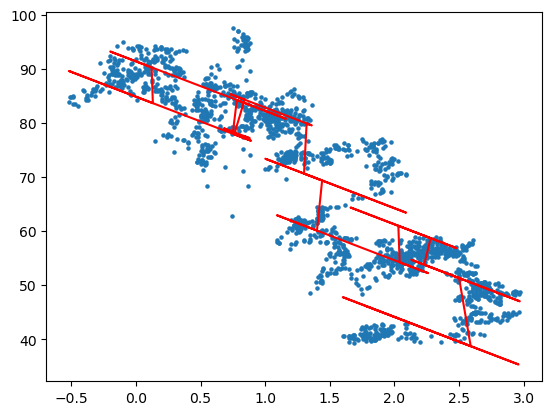

R-Squared: 0.9036073760921791
[ -9.14911784 -15.7975769 ]
['spread_10_3' 'Dividend Yield']
163.88434853365445


In [159]:
yearly_dividend_13_20 = spread_yield_3['2013':'2020'].copy()
MLR(yearly_dividend_13_20, 'Dividend Yield')
# yearly_dividend_13_20

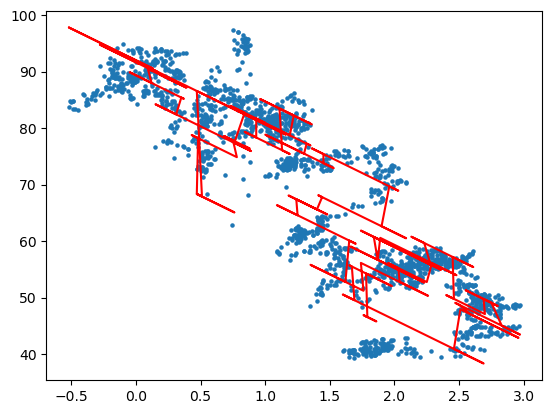

R-Squared: 0.8770708762074
[-11.20514033 -13.59513194]
['spread_10_3' 'Dividend Yield']
153.96239122528021


In [155]:
monthly_dividend_13_20 = spread_yield['2013':'2020'].copy()
MLR(monthly_dividend_13_20, 'Dividend Yield')

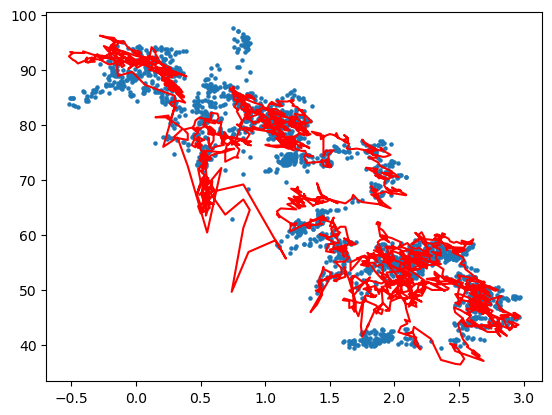

R-Squared: 0.9277359960417105
[-10.62188282 -16.20269742]
['spread_10_3' 'Dividend Yield']
165.75793862125346


In [143]:
daily_dividend_13_20 = daily_dividend.set_index(daily_dividend['Date'])['2013':'2020'].copy()
MLR(daily_dividend_13_20, 'Dividend Yield')

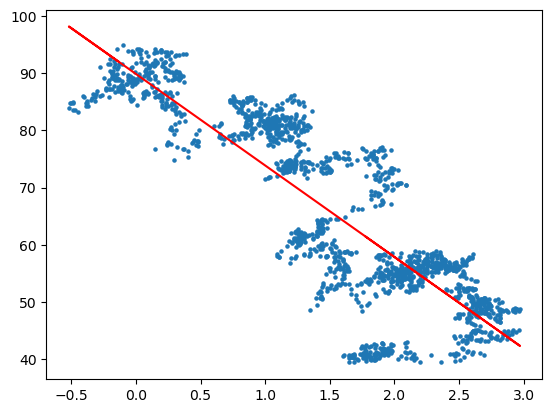

price = 89.84578866187562 + (-15.999942206176875) * spread
Correlation: -0.8591987976043544
R-Squared: 0.7382225738047683


In [115]:
plot_line(ry_13_20['spread_10_3'], ry_13_20['Adj Close'])

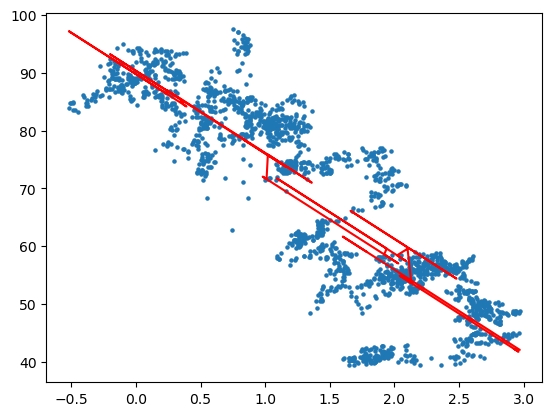

R-Squared: 0.7535497954744654
[-14.29534213 -11.53881992]
['spread_10_3' 'Price/Book']
111.55944801665322


In [157]:
MLR(ry_13_20, 'Price/Book')